In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from physics import definitions as phys

# Vectorized Piecewise Functions

In [46]:
# Define a piecewise function

def piece_func(x,y):

    if (x<10) & (y<10):
        return x+y
    elif (10<=x<=50) & (10<=y<=20):
        return x - y
    else:
        return 0


In [47]:
piece_func(20,15)

5

In [48]:
# Try a np.array input

x_list=np.arange(0,80,5)

In [49]:
x_list

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

In [50]:
piece_func(x_list, 15)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This reproduces the error that I am dealing with. Now try a vectorized function.

In [51]:
vec_func = np.vectorize(piece_func)

In [52]:
vec_func(x_list,2)

array([2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

This implies that as soon as if condition is satisfied it runs that part for all input values, and doesn't go over each value in the vector.

Now, try a np.where approach

In [53]:
def piece_func(x,y):
    conditions = [
        (x<10) & (y<10),
        (10<=x<=50) & (10<=y<=20)
    ]

    vals=[
        (x+y),
        (x-y)
    ]

    np.where(conditions, vals, 0)

In [54]:
piece_func(x_list, 5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [57]:
def piecewise_func(x, y):
    if x < 0 and y < 0:
        return x + y
    elif x >= 0 and y < 0:
        return x - y
    elif x < 0 and y >= 0:
        return -x + y
    else:
        return x * y

x_vals = np.array([-1, 0, 1])
y_vals = np.array([-2, 1, 2])

result = np.vectorize(piecewise_func)(x_vals, y_vals)

print(result)

[-3  0  2]


Try numpy.select for coding

In [62]:
def piece_func(x,y):
    conditions=[
        (x<10) & (y<10),
        (10<=x<=50) & (10<=y<=20)
    ]

    funcs = [
        (x+y),
        (x-y)
    ]

    return np.select(conditions , funcs)

In [63]:
piece_func(2,3)

array(5)

In [64]:
piece_func(x_list,2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [65]:
vec_func = np.vectorize(piece_func)

In [66]:
vec_func(x_list,2)

array([2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
import numpy as np

def piecewise_function(x, y):
    # Ensure x and y are numpy arrays for consistency
    x = np.asarray(x)
    y = np.asarray(y)

    # Define conditions
    conditions = [
        (x < 0) & (y < 0),
        (x >= 0) & (y < 0),
        (x < 0) & (y >= 0),
        (x >= 0) & (y >= 0)
    ]

    # Define corresponding outputs for each condition
    choices = [
        x + y,
        x - y,
        y - x,
        x * y
    ]

    # Use np.select to apply conditions and choices
    result = np.select(conditions, choices, default=np.nan)  # Use np.nan or another default if no condition is met

    return result

# Test with scalar inputs
scalar_result = piecewise_function(2, -3)
print(f"Scalar result: {scalar_result}")

# Test with array inputs
x_array = np.array([-1, 2, -3, 4])
y_array = np.array([-1, -2, 3, 4])
array_result = piecewise_function(x_array, y_array)
print(f"Array result: {array_result}")

# Test with array and scalar inputs
mix_result_xray = piecewise_function(x_array, -3)
mix_result_yray = piecewise_function(2, y_array)
print(f"Mix results with x_array and y scalar: {mix_result_xray}")
print(f"Mix results with x scalar and y_array: {mix_result_yray}")


Scalar result: 5.0
Array result: [-2.  4.  6. 16.]
Mix results with x_array and y scalar: [-4.  5. -6.  7.]
Mix results with x scalar and y_array: [3. 4. 6. 8.]


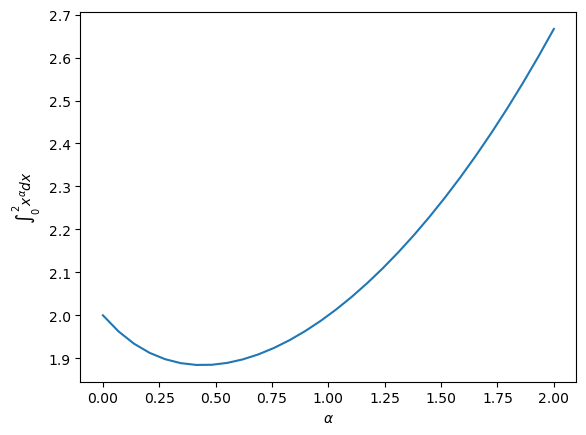

In [73]:
from scipy.integrate import quad_vec
import numpy as np
import matplotlib.pyplot as plt
alpha = np.linspace(0.0, 2.0, num=30)
f = lambda x: x**alpha
x0, x1 = 0, 2
y, err = quad_vec(f, x0, x1)
plt.plot(alpha, y)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\int_{0}^{2} x^\alpha dx$")
plt.show()

In [1]:
from scipy.optimize import fsolve

# Define the function with an extra parameter
def func(x, a):
    return x**3 - 2*x**2 - 5 + a

# Provide the value for the extra parameter
a_value = 3.0

# Provide an initial guess
initial_guess = 2.0

# Use lambda to include the extra argument
root = fsolve(lambda x: func(x, a_value), initial_guess)

print("Root:", root)

Root: [2.35930409]
